In [ ]:
# r1cdr_final

In [ ]:
import numpy as np 
import pandas as pd 
lasi_dad = pd.read_csv("/content/H_DAD_w1a3.csv")
lasi_dad.drop(['Unnamed: 0'],axis = 1,inplace=True)
lasi_dad.head()

,prim_key,hhid,pnc,pn,r1stateid,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,r1agey,ragender,r1phase,raeduc_l,raeducl,raedyrs,r1illiterate,h1rural,r1caste,r1lang_d,r1risk,r1distance,r1location,r1iwstat_d,r1wtresp,r1wtrespb,r1wtresp0,r1obsnoise,r1obsodor,r1obsair,r1obshouse,r1yr,r1fyr,r1season,r1fseason,r1date,r1fdate,r1dw,r1fdw,r1mo,...,r1prs_topcog,r1prs_allcog,r1prs_pc1,r1prs_pc2,r1prs_pc3,r1prs_pc4,r1prs_pc5,r1prs_pc6,r1prs_pc7,r1prs_pc8,r1prs_pc9,r1prs_pc10,r1rs7412,r1rs429358,r1cdr_final,r1cdr_incon,r1cdr_mem1,r1cdr_ori1,r1cdr_jud1,r1cdr_com1,r1cdr_hom1,r1cdr_per1,r1cdr_scor1,r1cdr_mem2,r1cdr_ori2,r1cdr_jud2,r1cdr_com2,r1cdr_hom2,r1cdr_per2,r1cdr_scor2,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3,r1raterid1,r1raterid2,r1raterid3
0,101000100040102,101000100040100,2,2,1,2019,1,224,1950,11.0,68,2,2,0,1,0,1,1,4.0,11,1,3,2,1,1.122860,35912.812500,1.205567,NaN,NaN,NaN,NaN,1,0,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5,7049.0,7021.0,7038.0
1,101000100320109,101000100320100,9,9,1,2019,1,224,1949,9.0,69,2,2,0,1,0,1,1,4.0,11,1,3,2,1,0.927889,8346.449219,0.450856,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.Yes,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5,7033.0,7038.0,7021.0
2,101000101040101,101000101040100,1,1,1,2019,1,223,1957,5.0,61,1,2,4,2,10,0,1,4.0,11,1,3,2,1,1.153473,19818.748047,0.799712,NaN,NaN,NaN,NaN,1,0,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5,7043.0,7020.0,7049.0
3,101000101720101,101000101720100,1,1,1,2019,1,222,1957,11.0,61,1,2,0,1,0,0,1,4.0,11,1,3,2,1,1.152450,7870.171387,0.434857,NaN,NaN,NaN,NaN,0,1,0,1,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.Yes,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,2.0,2.0,3.0,2.0,3.0,3.0,3.0,7043.0,7038.0,7046.0
4,101000101890107,101000101890100,7,7,1,2019,1,222,1949,4.0,69,1,2,3,2,8,0,1,4.0,11,1,3,2,1,1.155471,43178.371094,1.513006,NaN,NaN,NaN,NaN,1,0,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.No,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5,7049.0,7038.0,7020.0


In [ ]:
lasi_dad.columns

Index(['prim_key', 'hhid', 'pnc', 'pn', 'r1stateid', 'r1iwy_d', 'r1iwm_d',
       'r1lasidy', 'rabyear', 'rabmonth',
       ...
       'r1cdr_mem3', 'r1cdr_ori3', 'r1cdr_jud3', 'r1cdr_com3', 'r1cdr_hom3',
       'r1cdr_per3', 'r1cdr_scor3', 'r1raterid1', 'r1raterid2', 'r1raterid3'],
      dtype='object', length=729)

In [ ]:
lasi_dad.shape

(4096, 729)

In [ ]:
list(lasi_dad.isnull().sum())

In [ ]:
'''
https://www.kdnuggets.com/2015/05/7-methods-data-dimensionality-reduction.html
'''

In [ ]:
# Frequencies of null for each variable
# Percent of null values
# Total values are lasi_dad.shape[0] 
total_values = lasi_dad.shape[0]
percent_missing = {}
null_freq = list(lasi_dad.isnull().sum())
for i,column in enumerate(list(lasi_dad.columns)):
  percent_missing[column] = (null_freq[i]/total_values)*100 
percent_missing_df = pd.DataFrame(percent_missing.items())
percent_missing_df.columns = ['Attribute','Percent Missing (%)']
percent_missing_df.tail()

,Attribute,Percent Missing (%)
724,r1cdr_per3,38.28125
725,r1cdr_scor3,38.28125
726,r1raterid1,38.28125
727,r1raterid2,38.28125
728,r1raterid3,38.28125


In [ ]:
percent_missing_df.describe()

,Percent Missing (%)
count,729.000000
mean,8.986485
std,20.741255
min,0.000000
25%,0.000000
50%,0.000000
75%,1.464844
max,93.334961


Text(0, 0.5, 'Number of attributes')

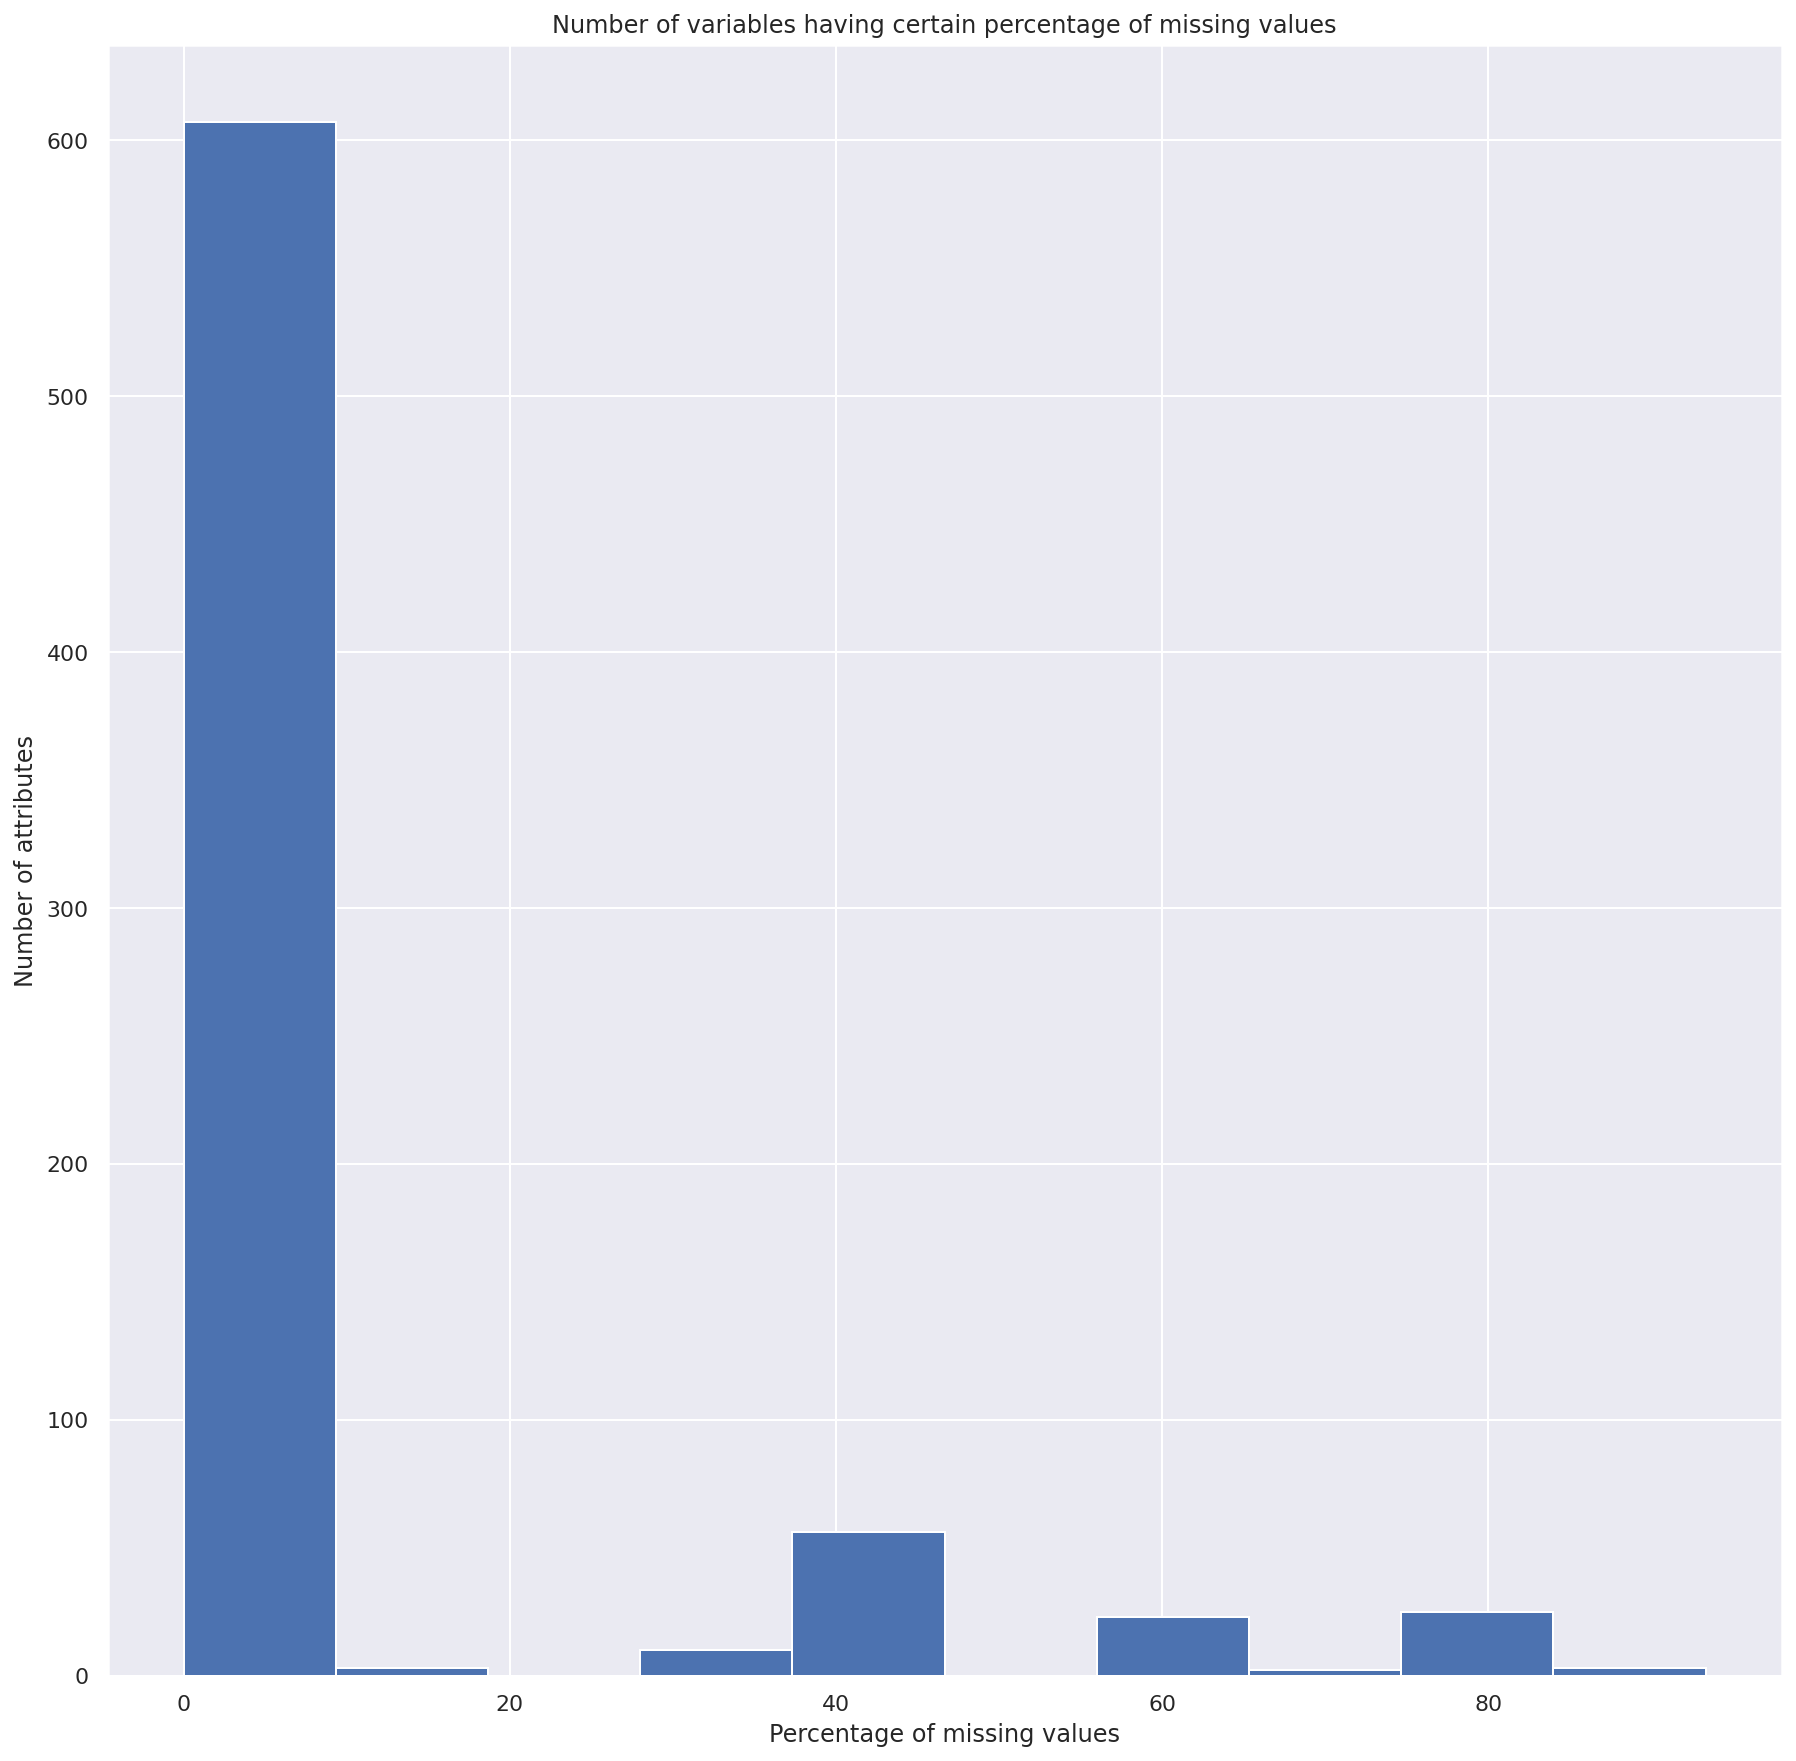

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'
percent_missing_df['Percent Missing (%)'].hist()
plt.title("Number of variables having certain percentage of missing values")
plt.xlabel("Percentage of missing values")
plt.ylabel("Number of attributes")

In [ ]:
majority_missing = percent_missing_df[percent_missing_df['Percent Missing (%)']>=50]

In [ ]:
percent_missing_df[percent_missing_df['Attribute']=="r1cdr_final"]

,Attribute,Percent Missing (%)
703,r1cdr_final,38.28125


In [ ]:
majority_missing.head()

,Attribute,Percent Missing (%)
27,r1obsnoise,80.468750
28,r1obsodor,80.468750
29,r1obsair,80.468750
30,r1obshouse,80.468750
57,r1trial2,81.640625


In [ ]:
majority_missing.shape

(53, 2)

In [ ]:
majority_missing.to_csv("Majority Missing.csv",index=False)

In [ ]:
filtered_stage_one = percent_missing_df[percent_missing_df['Percent Missing (%)']<50]

In [ ]:
filtered_stage_one = list(filtered_stage_one['Attribute'])

In [ ]:
filtered_stage_one

In [ ]:
filtered_stage_one_df = lasi_dad[filtered_stage_one]
filtered_stage_one_df.shape

(4096, 676)

In [ ]:
filtered_stage_one_df.to_csv("filtered_stage_one.csv",index=False)

In [ ]:
correlated_features = set()
correlation_matrix = filtered_stage_one_df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

In [ ]:
correlation_matrix

,prim_key,hhid,pnc,pn,r1stateid,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,r1agey,ragender,r1phase,raeduc_l,raeducl,raedyrs,r1illiterate,h1rural,r1caste,r1lang_d,r1risk,r1distance,r1location,r1iwstat_d,r1wtresp,r1wtrespb,r1wtresp0,r1yr,r1fyr,r1season,r1fseason,r1date,r1fdate,r1dw,r1fdw,r1mo,r1fmo,r1orient_t5,r1orient_t4,r1state,...,r1mna_fluid,r1mna_feed,r1mna_nstat,r1mna_hstat,r1mna_mac,r1mna_cc,r1mna_assess,r1mna_scale,r1turmerf,r1turmerq,r1hear_r,r1hear_l,r1hear_na,r1hear_aid,r1hear_p,r1cdr_final,r1cdr_mem1,r1cdr_ori1,r1cdr_jud1,r1cdr_com1,r1cdr_hom1,r1cdr_per1,r1cdr_scor1,r1cdr_mem2,r1cdr_ori2,r1cdr_jud2,r1cdr_com2,r1cdr_hom2,r1cdr_per2,r1cdr_scor2,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3,r1raterid1,r1raterid2,r1raterid3
prim_key,1.000000,1.000000,-0.134991,-0.134991,1.000000,-0.155627,-0.085587,-0.288619,-0.007990,-0.018579,-0.007609,0.018921,-0.229942,0.125252,0.075389,0.142901,-0.173044,-0.178172,0.000223,0.314769,0.032346,0.021197,0.030625,0.003806,-0.176324,-0.030781,-0.086165,0.080605,-0.070921,-0.008384,-0.032467,-0.015521,-0.049861,0.096785,-0.050395,-0.070569,-0.012430,0.027114,0.032866,0.087734,...,0.009986,0.016183,-0.020338,0.100424,-0.021408,0.076781,0.121754,0.049276,-0.049885,-0.210893,-0.048956,-0.087991,0.017739,-0.007369,0.027273,-0.007968,-0.013045,0.026631,-0.019682,0.039918,-0.040165,0.051129,-0.022266,-0.013151,0.025347,-0.026208,0.044808,-0.011267,0.066817,0.008374,-0.021553,0.008615,-0.016087,0.042132,-0.024042,0.040881,-0.005207,-0.013167,-0.026134,-0.028077
hhid,1.000000,1.000000,-0.134991,-0.134991,1.000000,-0.155627,-0.085587,-0.288619,-0.007990,-0.018579,-0.007609,0.018921,-0.229942,0.125252,0.075389,0.142901,-0.173044,-0.178172,0.000223,0.314769,0.032346,0.021197,0.030625,0.003806,-0.176324,-0.030781,-0.086165,0.080605,-0.070921,-0.008384,-0.032467,-0.015521,-0.049861,0.096785,-0.050395,-0.070569,-0.012430,0.027114,0.032866,0.087734,...,0.009986,0.016183,-0.020338,0.100424,-0.021408,0.076781,0.121754,0.049276,-0.049885,-0.210893,-0.048956,-0.087991,0.017739,-0.007369,0.027273,-0.007968,-0.013045,0.026631,-0.019682,0.039918,-0.040165,0.051129,-0.022266,-0.013151,0.025347,-0.026208,0.044808,-0.011267,0.066817,0.008374,-0.021553,0.008615,-0.016087,0.042132,-0.024042,0.040881,-0.005207,-0.013167,-0.026134,-0.028077
pnc,-0.134991,-0.134991,1.000000,1.000000,-0.134996,0.018639,0.017329,0.025113,-0.184347,-0.079260,0.189348,0.322324,0.028411,-0.229279,-0.190980,-0.245295,0.222283,0.068097,-0.006649,-0.013320,0.122314,-0.021018,0.035222,-0.022094,-0.014632,0.044230,0.024489,-0.249881,0.125838,-0.062557,0.042915,-0.142946,0.098581,-0.100011,0.048775,-0.121181,0.073726,-0.208507,-0.216287,-0.211870,...,-0.079802,-0.047532,-0.075171,-0.072354,-0.141812,-0.124734,-0.127479,-0.110525,-0.009769,0.062887,-0.096065,-0.091307,-0.000486,-0.001292,0.009379,0.141685,0.136985,0.189024,0.170974,0.132322,0.126924,0.073481,0.145550,0.162732,0.190468,0.177426,0.179560,0.142855,0.074675,0.142000,0.117972,0.187514,0.137434,0.140118,0.139228,0.064283,0.148975,-0.003716,0.023031,0.003450
pn,-0.134991,-0.134991,1.000000,1.000000,-0.134996,0.018639,0.017329,0.025113,-0.184347,-0.079260,0.189348,0.322324,0.028411,-0.229279,-0.190980,-0.245295,0.222283,0.068097,-0.006649,-0.013320,0.122314,-0.021018,0.035222,-0.022094,-0.014632,0.044230,0.024489,-0.249881,0.125838,-0.062557,0.042915,-0.142946,0.098581,-0.100011,0.048775,-0.121181,0.073726,-0.208507,-0.216287,-0.211870,...,-0.079802,-0.047532,-0.075171,-0.072354,-0.141812,-0.124734,-0.127479,-0.110525,-0.009769,0.062887,-0.096065,-0.091307,-0.000486,-0.001292,0.009379,0.141685,0.136985,0.189024,0.170974,0.132322,0.126924,0.073481,0.145550,0.162732,0.190468,0.177426,0.179560,0.142855,0.074675,0.142000,0.117972,0.187514,0.137434,0.140118,0.139228,0.064283,0.148975,-0.003716,0.023031,0.003450
r1stateid,1.000000,1.000000,-0.134996,-0.134996,1.000000,-0.155721,-0.085587,-0.288773,-0.007993,-0.018569,-0.007615,0.018909,-0.230032,0.125236,0.075371,

In [ ]:
correlation_matrix.loc[['r1cdr_final']].T.sort_values('r1cdr_final').to_csv("Correlation_with_target.csv",index=True)

In [ ]:
target_correlation = correlation_matrix.loc[['r1cdr_final']].T.sort_values('r1cdr_final')
target_correlation.head()

,r1cdr_final
r1hmse_score,-0.554373
r1hmse_scorz,-0.554373
r1cog_totalz,-0.526636
r1lasi_score,-0.521174
r1sgcp,-0.514425


In [ ]:
attributes_to_remove = [] 
# Those which have less than 5% correlation with the target
for index,row in target_correlation.iterrows():
  corr_val = row['r1cdr_final']
  if 0<=abs(corr_val)<=0.05:
    attributes_to_remove.append(index)

In [ ]:
removed_attributes = pd.DataFrame(attributes_to_remove)
removed_attributes.columns = ['Attribute']
removed_attributes.to_csv("Not correlated with target.csv",index=False)

In [ ]:
removed_attributes.shape

(81, 1)

In [ ]:
filtered_stage_two_df = filtered_stage_one_df[[x for x in filtered_stage_one_df.columns if x not in attributes_to_remove]]
filtered_stage_two_df.shape

(4096, 595)

In [ ]:
filtered_stage_two_df.head()

,pnc,pn,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,r1agey,ragender,r1phase,raeduc_l,raeducl,raedyrs,r1illiterate,h1rural,r1lang_d,r1risk,r1distance,r1iwstat_d,r1wtresp,r1yr,r1fyr,r1season,r1fseason,r1date,r1fdate,r1dw,r1fdw,r1mo,r1fmo,r1orient_t5,r1orient_t4,r1state,r1fstate,r1city,r1fcity,r1floor,r1ffloor,r1name,r1fname,...,r1mna_mob,r1mna_stress,r1mna_psycho,r1mna_screen,r1mna_protn,r1mna_protn3,r1mna_fluid,r1mna_feed,r1mna_nstat,r1mna_hstat,r1mna_mac,r1mna_cc,r1mna_assess,r1mna_scale,r1hear_r,r1hear_l,r1hear_p,r1cdr_final,r1cdr_incon,r1cdr_mem1,r1cdr_ori1,r1cdr_jud1,r1cdr_com1,r1cdr_hom1,r1cdr_per1,r1cdr_scor1,r1cdr_mem2,r1cdr_ori2,r1cdr_jud2,r1cdr_com2,r1cdr_hom2,r1cdr_per2,r1cdr_scor2,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3
0,2,2,2019,1,224,1950,11.0,68,2,2,0,1,0,1,1,11,1,3,1,1.122860,1,0,1,0,1,0,1,0,1,0,5,4,1,0,1,0,1,0,1,0,...,2.0,2.0,2.0,13.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,0.5,11.5,24.5,3.0,4.0,0.0,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5
1,9,9,2019,1,224,1949,9.0,69,2,2,0,1,0,1,1,11,1,3,1,0.927889,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,2.0,2.0,2.0,NaN,0.5,2.0,0.5,2.0,0.0,1.0,0.0,0.0,9.0,NaN,2.0,4.0,0.0,1.0,1.Yes,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5
2,1,1,2019,1,223,1957,5.0,61,1,2,4,2,10,0,1,11,1,3,1,1.153473,1,0,1,0,1,0,1,0,1,0,5,4,1,0,1,0,1,0,1,0,...,2.0,2.0,2.0,9.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,6.5,15.5,5.0,5.0,0.0,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
3,1,1,2019,1,222,1957,11.0,61,1,2,0,1,0,0,1,11,1,3,1,1.152450,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.Yes,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,2.0,2.0,3.0,2.0,3.0,3.0,3.0
4,7,7,2019,1,222,1949,4.0,69,1,2,3,2,8,0,1,11,1,3,1,1.155471,1,0,1,0,1,0,1,0,1,0,5,4,1,0,1,0,1,0,1,0,...,2.0,2.0,2.0,11.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,8.0,19.0,4.0,3.0,0.0,0.5,0.No,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5


In [ ]:
filtered_stage_two_df.to_csv("filtered_stage_two_df.csv",index=False)

In [ ]:
def correlation(dataset, threshold,target):
    dataset = dataset.drop([target],axis=1)
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return col_corr

In [ ]:
correlated_cols = correlation(filtered_stage_two_df,0.9,'r1cdr_final')

In [ ]:
len(correlated_cols)

172

In [ ]:
filtered_stage_three_df = filtered_stage_two_df[[x for x in filtered_stage_two_df.columns if x not in correlated_cols]]

In [ ]:
filtered_stage_three_df.head()

,pnc,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,ragender,r1phase,raeduc_l,r1illiterate,h1rural,r1lang_d,r1risk,r1distance,r1iwstat_d,r1wtresp,r1yr,r1fyr,r1season,r1fseason,r1date,r1fdate,r1dw,r1fdw,r1mo,r1fmo,r1orient_t5,r1state,r1fstate,r1city,r1fcity,r1floor,r1ffloor,r1name,r1fname,r1address,r1faddress,r1orient_p5,r1trial1,r1ftrial1,...,r1mna_wloss,r1mna_mob,r1mna_stress,r1mna_psycho,r1mna_screen,r1mna_protn,r1mna_fluid,r1mna_feed,r1mna_nstat,r1mna_hstat,r1mna_mac,r1mna_cc,r1mna_assess,r1mna_scale,r1hear_r,r1hear_l,r1hear_p,r1cdr_final,r1cdr_incon,r1cdr_mem1,r1cdr_ori1,r1cdr_jud1,r1cdr_com1,r1cdr_hom1,r1cdr_per1,r1cdr_scor1,r1cdr_mem2,r1cdr_ori2,r1cdr_jud2,r1cdr_com2,r1cdr_hom2,r1cdr_per2,r1cdr_scor2,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3
0,2,2019,1,224,1950,11.0,2,2,0,1,1,11,1,3,1,1.122860,1,0,1,0,1,0,1,0,1,0,5,1,0,1,0,1,0,1,0,1,0,5,3,0,...,3.0,2.0,2.0,2.0,13.0,0.0,1.0,2.0,2.0,0.0,1.0,0.5,11.5,24.5,3.0,4.0,0.0,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5
1,9,2019,1,224,1949,9.0,2,2,0,1,1,11,1,3,1,0.927889,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0,...,1.0,2.0,2.0,2.0,NaN,0.5,0.5,2.0,0.0,1.0,0.0,0.0,9.0,NaN,2.0,4.0,0.0,1.0,1.Yes,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5
2,1,2019,1,223,1957,5.0,1,2,4,0,1,11,1,3,1,1.153473,1,0,1,0,1,0,1,0,1,0,5,1,0,1,0,1,0,1,0,1,0,5,3,0,...,1.0,2.0,2.0,2.0,9.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,6.5,15.5,5.0,5.0,0.0,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
3,1,2019,1,222,1957,11.0,1,2,0,0,1,11,1,3,1,1.152450,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.Yes,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,2.0,2.0,3.0,2.0,3.0,3.0,3.0
4,7,2019,1,222,1949,4.0,1,2,3,0,1,11,1,3,1,1.155471,1,0,1,0,1,0,1,0,1,0,5,1,0,1,0,1,0,1,0,1,0,5,3,0,...,3.0,2.0,2.0,2.0,11.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,8.0,19.0,4.0,3.0,0.0,0.5,0.No,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5


In [ ]:
filtered_stage_three_df['r1cdr_final']

In [ ]:
filtered_stage_three_df.to_csv("filtered_stage_three_df.csv")

In [ ]:
filtered_stage_three_df

,pnc,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,ragender,r1phase,raeduc_l,r1illiterate,h1rural,r1lang_d,r1risk,r1distance,r1iwstat_d,r1wtresp,r1yr,r1fyr,r1season,r1fseason,r1date,r1fdate,r1dw,r1fdw,r1mo,r1fmo,r1orient_t5,r1state,r1fstate,r1city,r1fcity,r1floor,r1ffloor,r1name,r1fname,r1address,r1faddress,r1orient_p5,r1trial1,r1ftrial1,...,r1mna_wloss,r1mna_mob,r1mna_stress,r1mna_psycho,r1mna_screen,r1mna_protn,r1mna_fluid,r1mna_feed,r1mna_nstat,r1mna_hstat,r1mna_mac,r1mna_cc,r1mna_assess,r1mna_scale,r1hear_r,r1hear_l,r1hear_p,r1cdr_final,r1cdr_incon,r1cdr_mem1,r1cdr_ori1,r1cdr_jud1,r1cdr_com1,r1cdr_hom1,r1cdr_per1,r1cdr_scor1,r1cdr_mem2,r1cdr_ori2,r1cdr_jud2,r1cdr_com2,r1cdr_hom2,r1cdr_per2,r1cdr_scor2,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3
0,2,2019,1,224,1950,11.0,2,2,0,1,1,11,1,3,1,1.122860,1,0,1,0,1,0,1,0,1,0,5,1,0,1,0,1,0,1,0,1,0,5,3,0,...,3.0,2.0,2.0,2.0,13.0,0.0,1.0,2.0,2.0,0.0,1.0,0.5,11.5,24.5,3.0,4.0,0.0,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5
1,9,2019,1,224,1949,9.0,2,2,0,1,1,11,1,3,1,0.927889,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0,...,1.0,2.0,2.0,2.0,NaN,0.5,0.5,2.0,0.0,1.0,0.0,0.0,9.0,NaN,2.0,4.0,0.0,1.0,1.Yes,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5
2,1,2019,1,223,1957,5.0,1,2,4,0,1,11,1,3,1,1.153473,1,0,1,0,1,0,1,0,1,0,5,1,0,1,0,1,0,1,0,1,0,5,3,0,...,1.0,2.0,2.0,2.0,9.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,6.5,15.5,5.0,5.0,0.0,0.5,0.No,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
3,1,2019,1,222,1957,11.0,1,2,0,0,1,11,1,3,1,1.152450,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.Yes,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,2.0,2.0,3.0,2.0,3.0,3.0,3.0
4,7,2019,1,222,1949,4.0,1,2,3,0,1,11,1,3,1,1.155471,1,0,1,0,1,0,1,0,1,0,5,1,0,1,0,1,0,1,0,1,0,5,3,0,...,3.0,2.0,2.0,2.0,11.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,8.0,19.0,4.0,3.0,0.0,0.5,0.No,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,6,2018,11,93,1938,6.0,2,2,0,1,0,19,0,3,1,0.831697,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,3,3,0,...,1.0,2.0,2.0,0.0,5.0,1.0,0.0,1.0,0.0,0.5,0.0,0.0,6.5,11.5,2.0,2.0,0.0,0.5,0.No,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.5
4092,1,2018,10,71,1953,2.0,1,2,3,0,0,19,1,3,1,0.826660,1,0,1,0,1,0,1,0,1,0,5,1,0,1,0,1,0,1,0,1,0,5,3,0,...,1.0,2.0,0.0,0.0,4.0,0.5,0.0,2.0,1.0,1.0,1.0,0.0,8.5,12.5,2.0,2.0,0.0,0.0,0.No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4093,1,2018,10,61,1956,10.0,1,2,0,1,0,19,0,3,1,1.114914,0,1,1,0,1,0,0,1,1,0,3,1,0,1,0,1,0,1,0,0,1,4,3,0,...,3.0,2.0,2.0,2.0,11.0,0.0,1.0,2.0,0.0,1.0,1.0,0.5,10.5,21.5,4.0,4.0,0.0,0.0,1.Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.5
4094,2,2018,11,98,1958,1.0,2,2,2,1,0,19,1,3,1,0.665601,0,0,1,0,1,0,1,0,1,0,4,0,1,1,0,1,0,0,1,1,0,3,3,0,...,1.0,2.0,NaN,NaN,NaN,0.0,0.5,2.0,0.0,NaN,1.0,0.5,NaN,NaN,1.0,1.0,0.0,0.5,1.Yes,1.0,1.0,0.5,1.0,0.5,0.0,0.5,1.0,1.0,1.0,0.5,0.5,0.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(filtered_stage_three_df),columns = filtered_stage_three_df.columns)

In [ ]:
imputed_data.head()

,pnc,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,ragender,r1phase,raeduc_l,r1illiterate,h1rural,r1lang_d,r1risk,r1distance,r1iwstat_d,r1wtresp,r1yr,r1fyr,r1season,r1fseason,r1date,r1fdate,r1dw,r1fdw,r1mo,r1fmo,r1orient_t5,r1state,r1fstate,r1city,r1fcity,r1floor,r1ffloor,r1name,r1fname,r1address,r1faddress,r1orient_p5,r1trial1,r1ftrial1,...,r1mna_wloss,r1mna_mob,r1mna_stress,r1mna_psycho,r1mna_screen,r1mna_protn,r1mna_fluid,r1mna_feed,r1mna_nstat,r1mna_hstat,r1mna_mac,r1mna_cc,r1mna_assess,r1mna_scale,r1hear_r,r1hear_l,r1hear_p,r1cdr_final,r1cdr_incon,r1cdr_mem1,r1cdr_ori1,r1cdr_jud1,r1cdr_com1,r1cdr_hom1,r1cdr_per1,r1cdr_scor1,r1cdr_mem2,r1cdr_ori2,r1cdr_jud2,r1cdr_com2,r1cdr_hom2,r1cdr_per2,r1cdr_scor2,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3
0,2.0,2019.0,1.0,224.0,1950.0,11.0,2.0,2.0,0.0,1.0,1.0,11.0,1.0,3.0,1.0,1.122860,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0,0.0,...,3.0,2.0,2.0,2.0,13.0,0.0,1.0,2.0,2.0,0.0,1.0,0.5,11.5,24.5,3.0,4.0,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5
1,9.0,2019.0,1.0,224.0,1949.0,9.0,2.0,2.0,0.0,1.0,1.0,11.0,1.0,3.0,1.0,0.927889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,1.0,2.0,2.0,2.0,8.8,0.5,0.5,2.0,0.0,1.0,0.0,0.0,9.0,17.1,2.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5
2,1.0,2019.0,1.0,223.0,1957.0,5.0,1.0,2.0,4.0,0.0,1.0,11.0,1.0,3.0,1.0,1.153473,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0,0.0,...,1.0,2.0,2.0,2.0,9.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,6.5,15.5,5.0,5.0,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
3,1.0,2019.0,1.0,222.0,1957.0,11.0,1.0,2.0,0.0,0.0,1.0,11.0,1.0,3.0,1.0,1.152450,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.8,0.0,1.6,2.0,10.4,0.0,0.6,1.6,0.4,0.6,1.0,0.0,8.1,19.5,2.6,3.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,2.0,2.0,3.0,2.0,3.0,3.0,3.0
4,7.0,2019.0,1.0,222.0,1949.0,4.0,1.0,2.0,3.0,0.0,1.0,11.0,1.0,3.0,1.0,1.155471,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0,0.0,...,3.0,2.0,2.0,2.0,11.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,8.0,19.0,4.0,3.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5


In [ ]:
imputed_data.isnull().sum()

pnc            0
r1iwy_d        0
r1iwm_d        0
r1lasidy       0
rabyear        0
              ..
r1cdr_jud3     0
r1cdr_com3     0
r1cdr_hom3     0
r1cdr_per3     0
r1cdr_scor3    0
Length: 423, dtype: int64

In [ ]:
imputed_data.to_csv("imputed_data.csv")